#1. Распознавание методом к-го ближайшего соседа

Задание:

Внимание: два варианта работы.

Данные описаны ниже.

Для распознавания использовать метод k-го ближайшего соседа.

Выбрать критерий качества.

Построить модель для распознавания целевой переменной (отклика).


Дано:

Bank Marketing Data Set

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required

The classification goal is to predict if the client will subscribe a term deposit (variable y).

Number of Instances: 45211 Number of Attributes: 17

Missing Values? N/A

bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information

Input variables

Ответ:

В данном задании была построена модель для распознавания целевой переменной (отклика) на основе Bank Marketing Data Set. Для распознавания использовался метод k-го ближайшего соседа. Критерием качества для данной выборки выбран Recall.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Атрибут 'duration' сильно влияет на цель вывода (например, если duration=0, то y='no'),
# поэтому эти данные отбрасываем для получения реалистичной прогностической модели

df = df.loc[df['duration'] != 0]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45208, 17)

In [ ]:
# Проверим сбалансированность выборки

df['y'].value_counts() # выборка не сбалансированная, тк разница в 8 раз

no     39919
yes     5289
Name: y, dtype: int64

In [ ]:
df['y'].value_counts(normalize=True) # выборка не сбалансированная, тк разница в 8 раз

no     0.883007
yes    0.116993
Name: y, dtype: float64

In [ ]:
# Получим новый датафрейм только со значением y=yes

df_one = df.loc[df['y'] == 'yes']
df_one.shape

(5289, 17)

In [ ]:
# Получим новый датафрейм только со значением y=no и обновим индексы

df_y = df.loc[df['y'] == 'no']
df_y = df_y.reset_index(drop=True)
df_y.shape

(39919, 17)

In [ ]:
# Отделим первые 10578 строк значений в датафрейме только со значением y=no

df_two = df_y.loc[:10577]
df_two.shape

(10578, 17)

In [ ]:
# Создадим новый датафрейм, состоящий из двойного набора данных со значением отклика y=yes (5289*2=10578 строк)
# и набора данных со значением отклика y=no (10578 строк)

df_new = pd.concat([df_one, df_one, df_two], ignore_index=True)
df_new.shape

(21156, 17)

In [ ]:
# Проверим сбалансированность выборки нового датафрейма

df_new['y'].value_counts() # выборка сбалансирована

yes    10578
no     10578
Name: y, dtype: int64

In [ ]:
df_new['y'].value_counts(normalize=True) # выборка сбалансирована

yes    0.5
no     0.5
Name: y, dtype: float64

{0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}


Text(0.5, 1.0, 'Распределение частотности классов в атрибуте job')

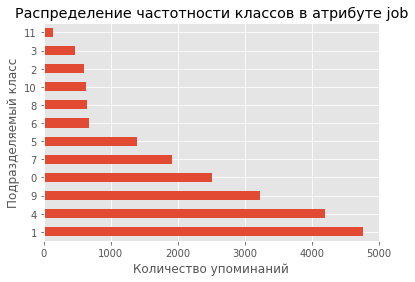

In [ ]:
# Заменим категориальные признаки на числовые

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
mapped_job = pd.Series(label_encoder.fit_transform(df_new['job']))

mapped_job.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

plt.xlabel('Количество упоминаний')
plt.ylabel('Подразделяемый класс')
plt.title('Распределение частотности классов в атрибуте job')

In [ ]:
categorical_columns = df_new.columns[df_new.dtypes == 'object'].union(['job'])
for column in categorical_columns:
    df_new[column] = label_encoder.fit_transform(df_new[column])
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
df_new.shape

(21156, 17)

In [ ]:
#  Разделим предикторы и отклики

X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, 16].values  

In [ ]:
# Разделими на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  

In [ ]:
#  Стандартизация предикторов

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()   #   среднее 0, ст.отклонение 1
scaler.fit(X_train)

#  Одинаковые параметры стандартизации у обучающего и тестового множества

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

In [ ]:
#  Построение классификатора

from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  #  попробуем вариант с 5 соседями
classifier.fit(X_train_2, y_train)  


KNeighborsClassifier(n_neighbors=5, # число ближайших соседей
        algorithm='auto',   #  как искать ближайших соседей
        leaf_size=30,       #  параметр  BallTree или KDTree
        metric='minkowski', #  расстояние между объектами
        p=2,                #  расстояние Минковского  превращается в евклидово
        metric_params=None, #  используем для самодельных расстояний
        n_jobs=1,           #  число процессов
        weights='uniform')  #  все наблюдения равноправны

KNeighborsClassifier(n_jobs=1)

In [ ]:
#  Используем классификатор на обучающей и тестовой выборках

y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  

In [ ]:
# Таблица сопряженности. Измеряем, насколько хороша модель

from sklearn.metrics import confusion_matrix, recall_score

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')
conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_train

Таблица сопряженности для обучающей выборки


,0,1
0,7007,85
1,346,6736


In [ ]:
print('Recall на обучающей выборке', recall_score(y_train, y_pred_train))

Recall на обучающей выборке 0.9511437447048856


In [ ]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')
conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_test

Таблица сопряженности для тестовой выборки


,0,1
0,3430,56
1,220,3276


In [ ]:
print('Recall на тестовой выборке', recall_score(y_test, y_pred_test))

Recall на тестовой выборке 0.937070938215103


In [ ]:
#  Определяем оптимальное число ближайших соседей, когда accuracy будет максимальным

error_rate = [-9999]*30     # вектор результатов 

for i in range(1, 31):  #  число ближайших соседей меняем от 1 до 30 и каждый раз считаем долю ошибок
    knn_res = KNeighborsClassifier(n_neighbors=i)
    knn_res.fit(X_train_2, y_train)
    pred_i = knn_res.predict(X_test_2)
    error_rate[i-1]= np.mean(pred_i != y_test) # считаем среднеарифметическое по столбцу из логических значений

In [ ]:
#  Доля ошибок при разных k

print(np.round_(error_rate, 2))

[0.02 0.05 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.04 0.05
 0.04 0.05 0.04 0.05 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05]


Text(0, 0.5, 'Доля ошибок')

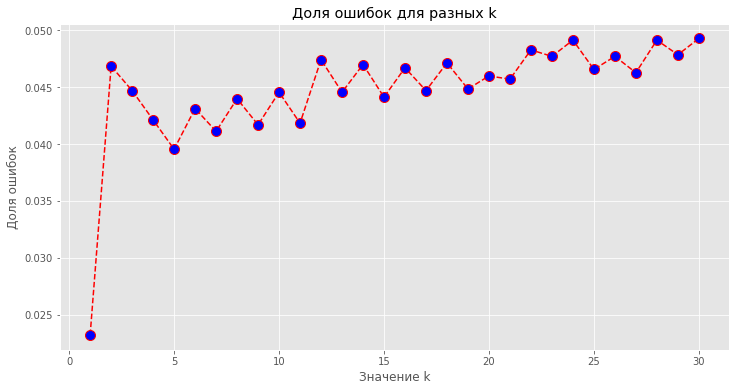

In [ ]:
# Рисуем line plot для вектора error. Будем искать, при каком k минимум

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 31), error_rate, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.title(u'Доля ошибок для разных k')  
plt.xlabel(u'Значение k')  
plt.ylabel(u'Доля ошибок') 

Минимум достигается при k=5, следовательно, предположение было верным.

In [ ]:
#  Измеряем, насколько хороша модель

from sklearn.metrics import classification_report

print(u'Таблица сопряженности для обучающей выборки')
print(confusion_matrix(y_train, y_pred_train))  
print('Recall на обучающей выборке', recall_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train)) 

print(u'Таблица сопряженности для тестовой выборки')
print(confusion_matrix(y_test, y_pred_test))  
print('Recall на тестовой выборке', recall_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test)) 

Таблица сопряженности для обучающей выборки
[[7007   85]
 [ 346 6736]]
Recall на обучающей выборке 0.9511437447048856
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7092
           1       0.99      0.95      0.97      7082

    accuracy                           0.97     14174
   macro avg       0.97      0.97      0.97     14174
weighted avg       0.97      0.97      0.97     14174

Таблица сопряженности для тестовой выборки
[[3430   56]
 [ 220 3276]]
Recall на тестовой выборке 0.937070938215103
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3486
           1       0.98      0.94      0.96      3496

    accuracy                           0.96      6982
   macro avg       0.96      0.96      0.96      6982
weighted avg       0.96      0.96      0.96      6982

